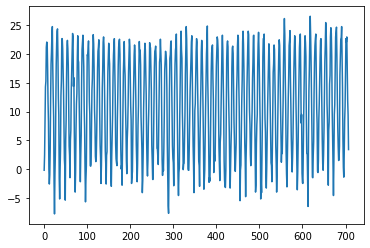

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RomaniaDataV2.csv', usecols = [2], engine='python')
plt.plot(df)
plt.show()

Epoch 1/100
493/493 - 1s - loss: 0.0641 - 1s/epoch - 3ms/step
Epoch 2/100
493/493 - 0s - loss: 0.0249 - 388ms/epoch - 787us/step
Epoch 3/100
493/493 - 0s - loss: 0.0218 - 408ms/epoch - 828us/step
Epoch 4/100
493/493 - 0s - loss: 0.0203 - 412ms/epoch - 836us/step
Epoch 5/100
493/493 - 0s - loss: 0.0196 - 391ms/epoch - 794us/step
Epoch 6/100
493/493 - 0s - loss: 0.0197 - 474ms/epoch - 962us/step
Epoch 7/100
493/493 - 0s - loss: 0.0196 - 386ms/epoch - 783us/step
Epoch 8/100
493/493 - 0s - loss: 0.0194 - 384ms/epoch - 779us/step
Epoch 9/100
493/493 - 0s - loss: 0.0195 - 463ms/epoch - 939us/step
Epoch 10/100
493/493 - 1s - loss: 0.0197 - 524ms/epoch - 1ms/step
Epoch 11/100
493/493 - 1s - loss: 0.0194 - 514ms/epoch - 1ms/step
Epoch 12/100
493/493 - 0s - loss: 0.0195 - 390ms/epoch - 791us/step
Epoch 13/100
493/493 - 0s - loss: 0.0195 - 376ms/epoch - 763us/step
Epoch 14/100
493/493 - 0s - loss: 0.0196 - 433ms/epoch - 878us/step
Epoch 15/100
493/493 - 0s - loss: 0.0194 - 409ms/epoch - 830us/ste

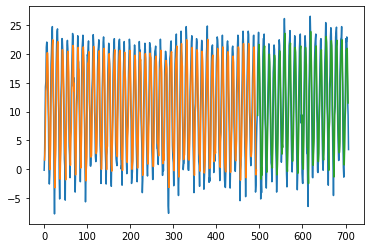

In [16]:
import matplotlib.pyplot as plt
import pandas
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)
df = pd.read_csv('RomaniaDataV2.csv', usecols = [2], engine='python', nrows=50)
dataset = df.values
dataset = dataset.astype('float32')

dataX, dataY = create_dataset(dataset=dataset)


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

look_back = 1
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [6]:
%pip install numpy
%pip install keras
%pip install sklearn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\georg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\georg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\users\georg\appdata\local\programs\python\python39\lib\site-packages (from scikit-learn->sklearn) (1.1.0)



You should consider upgrading via the 'C:\Users\georg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.  Downloading opt_einsum-3.3.0-py3-none-any.whl (65 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\georg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
